In [37]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv("USA_Covid_19.csv")
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [39]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [40]:
df.shape

(58, 18)

there are 58 rows and 18 columns

In [41]:
len(df["Province_State"].unique())

58

There are 58 different entries corresponding to different province/state

In [42]:
# the latitude and logitude will be unique to the province/state 
# =>keeping the province/state column the latitude and longitude column can be dropped.

df.drop("Lat",axis=1,inplace=True)
df.drop("Long_",axis=1,inplace=True)
df.head()

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [43]:
# Checking for null values

df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

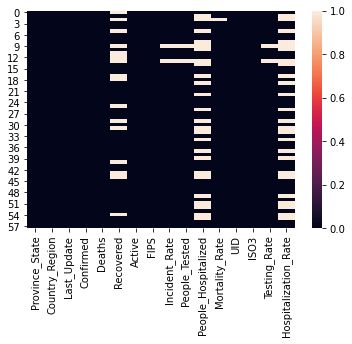

In [44]:
# visualizing null values using heatmap

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull())
plt.show()

There are many missing values in recovered, people_hospitalized and hospitalization_rate columns.

few null values are also present in incident rate, people tested and testing rate columns.

In [45]:
# Imputing

for i in df[["Recovered",'Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']]:
    df[i]=df[i].replace(np.nan,df[i].mean())
    
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

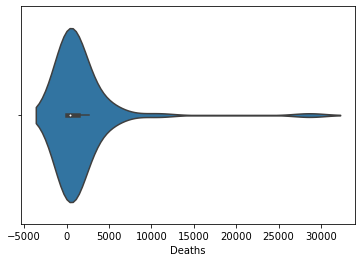

In [46]:
# Univariate analysis

# Deaths

sns.violinplot(df["Deaths"])
plt.show()

The distribution is right skewed.

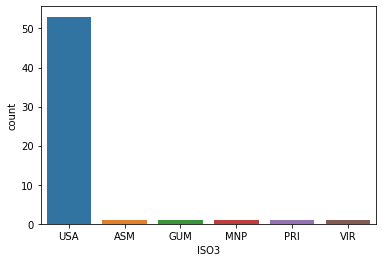

In [47]:
# country_region

sns.countplot(df["ISO3"])
plt.show()

We see that most entries corresponds to 'USA' official code country identifier.

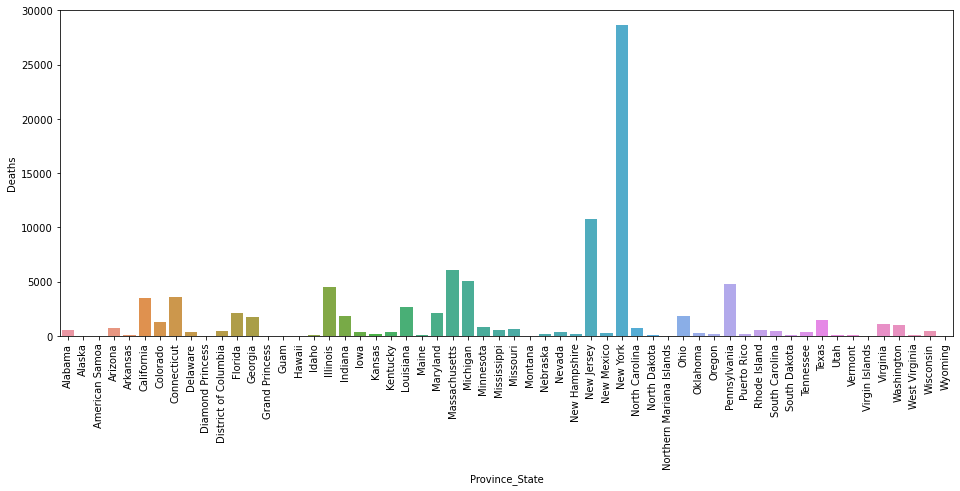

In [48]:
# Bivariate analysis

# provine/state vs deaths

plt.figure(figsize=(16,6))
ax = sns.barplot(df["Province_State"],df["Deaths"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Highest number of deaths recorded is in New York with New Jersey in second.

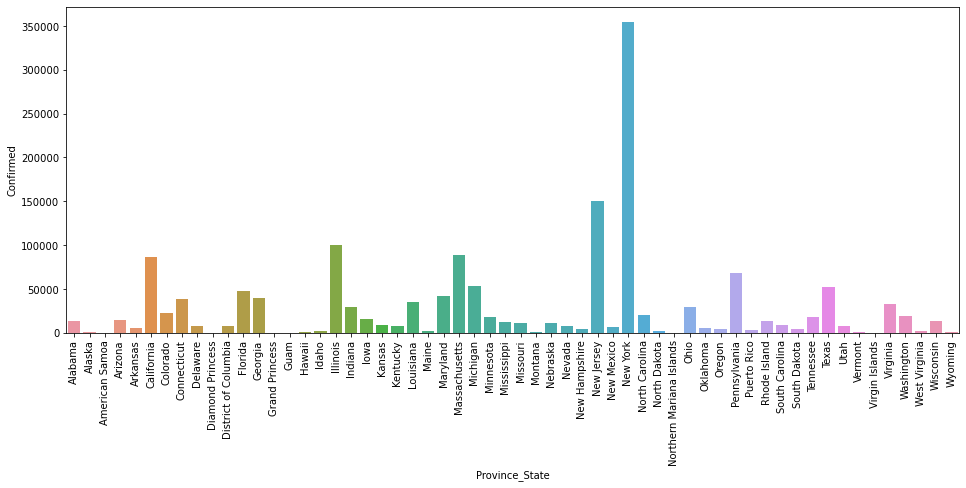

In [49]:
# provine/state vs confirmed

plt.figure(figsize=(16,6))
ax = sns.barplot(df["Province_State"],df["Confirmed"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

New York also has the most number of confirmed cases => most number of deaths.

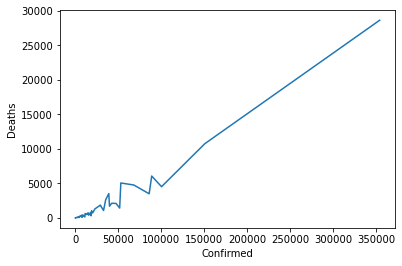

In [50]:
# confirmed vs deaths

sns.lineplot(df["Confirmed"],df["Deaths"])
plt.show()

There is a positive linear relationship => as confirmed cases increases so does the number of deaths.

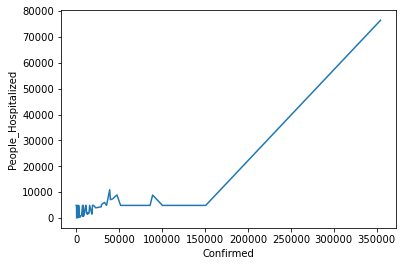

In [51]:
sns.lineplot(df["Confirmed"],df["People_Hospitalized"])

Initially even though the cases were confirmed less number of people were hospitalized, later the hospitalization rate increases with confirmed cases.

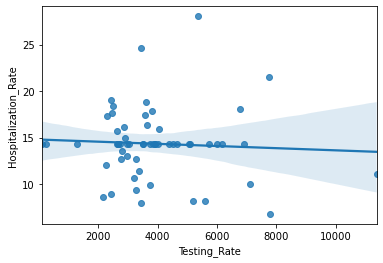

In [52]:
sns.regplot(df["Testing_Rate"],df["Hospitalization_Rate"])
plt.show()

As testing rate increases the hospitalization rate remains the same => the US conducted extensive testing 

In [53]:
df["Last_Update"].unique()

array(['2020-05-21 02:32:54'], dtype=object)

In [54]:
len(df["FIPS"].unique())

58

In [55]:
df["Country_Region"].unique()

array(['US'], dtype=object)

In [56]:
# All the data collected was updated on 21-05-2020 at 02:32:54, Dropping the column Last_Updated as it is same for all rows
df.drop("Last_Update",axis=1,inplace=True)

# FIPS is unique for every row, hence will not provide relavent information
df.drop("FIPS",axis=1,inplace=True)

# The dataset consits of tests conducted only in the US => the column country has no significance
df.drop("Country_Region",axis=1,inplace=True)

# UID is unique identifier for each row entry => no relavent information for the target variable
df.drop("UID",axis=1,inplace=True)

df.head()

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,13052,522,7007.428571,12530.0,266.194321,164450.0,1493.000000,3.999387,USA,3353.942386,11.438860
1,Alaska,401,10,352.000000,39.0,54.815493,37045.0,4897.454545,2.493766,USA,5063.940017,14.342541
2,American Samoa,0,0,7007.428571,0.0,0.000000,124.0,4897.454545,4.458248,ASM,222.857246,14.342541
3,Arizona,14906,747,3773.000000,10386.0,204.788838,165435.0,1792.000000,5.011405,USA,2272.859351,12.022005
4,Arkansas,5003,107,3852.000000,1044.0,165.782801,96258.0,535.000000,2.138717,USA,3189.670370,10.693584


In [57]:
# Changing the index

df = df.set_index(df["Province_State"])
df.drop("Province_State",axis=1,inplace=True)
df.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,,,,,,,,,,,
Alabama,13052,522,7007.428571,12530.0,266.194321,164450.0,1493.000000,3.999387,USA,3353.942386,11.438860
Alaska,401,10,352.000000,39.0,54.815493,37045.0,4897.454545,2.493766,USA,5063.940017,14.342541
American Samoa,0,0,7007.428571,0.0,0.000000,124.0,4897.454545,4.458248,ASM,222.857246,14.342541
Arizona,14906,747,3773.000000,10386.0,204.788838,165435.0,1792.000000,5.011405,USA,2272.859351,12.022005
Arkansas,5003,107,3852.000000,1044.0,165.782801,96258.0,535.000000,2.138717,USA,3189.670370,10.693584


In [58]:
# Converting categorical to numerical data
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df[['ISO3']] = df[['ISO3']].apply(label_encoder.fit_transform)
df.head()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,,,,,,,,,,,
Alabama,13052,522,7007.428571,12530.0,266.194321,164450.0,1493.000000,3.999387,4,3353.942386,11.438860
Alaska,401,10,352.000000,39.0,54.815493,37045.0,4897.454545,2.493766,4,5063.940017,14.342541
American Samoa,0,0,7007.428571,0.0,0.000000,124.0,4897.454545,4.458248,0,222.857246,14.342541
Arizona,14906,747,3773.000000,10386.0,204.788838,165435.0,1792.000000,5.011405,4,2272.859351,12.022005
Arkansas,5003,107,3852.000000,1044.0,165.782801,96258.0,535.000000,2.138717,4,3189.670370,10.693584


In [59]:
# Correlation
df.corr()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
Confirmed,1.000000,0.982191,0.822547,0.985218,0.708436,0.824136,8.692673e-01,0.382537,1.099993e-01,0.332464,2.874708e-01
Deaths,0.982191,1.000000,0.830223,0.954378,0.710105,0.739634,9.082786e-01,0.427127,8.558846e-02,0.344465,2.982254e-01
Recovered,0.822547,0.830223,1.000000,0.725085,0.542795,0.711255,7.618294e-01,0.322160,6.807968e-02,0.220597,2.316917e-01
Active,0.985218,0.954378,0.725085,1.000000,0.700926,0.826144,8.359377e-01,0.367626,1.048243e-01,0.321395,2.845637e-01
Incident_Rate,0.708436,0.710105,0.542795,0.700926,1.000000,0.441669,5.510764e-01,0.353882,1.954154e-01,0.620621,1.960289e-01
People_Tested,0.824136,0.739634,0.711255,0.826144,0.441669,1.000000,6.420913e-01,0.220200,1.665665e-01,0.230753,2.526802e-01
People_Hospitalized,0.869267,0.908279,0.761829,0.835938,0.551076,0.642091,1.000000e+00,0.334335,4.762249e-18,0.270255,3.775863e-01
Mortality_Rate,0.382537,0.427127,0.322160,0.367626,0.353882,0.220200,3.343354e-01,1.000000,-2.487630e-02,0.158970,4.512178e-01
ISO3,0.109999,0.085588,0.068080,0.104824,0.195415,0.166566,4.762249e-18,-0.024876,1.000000e+00,0.159242,2.644221e-17
Testing_Rate,0.332464,0.344465,0.220597,0.321395,0.620621,0.230753,2.702546e-01,0.158970,1.592417e-01,1.000000,-5.846277e-02


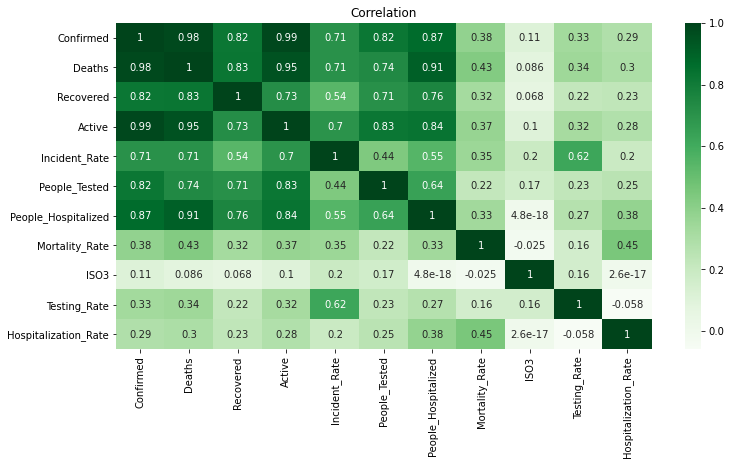

In [60]:
# Visualizing correlation

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Greens')
plt.show()

The target variable deaths has high positive correlation with Confirmed, recovered, active, incident rate, people tested and people hospidalized.

it is also moserately positive correlated to mortality rate, testing rate and hospitalization.

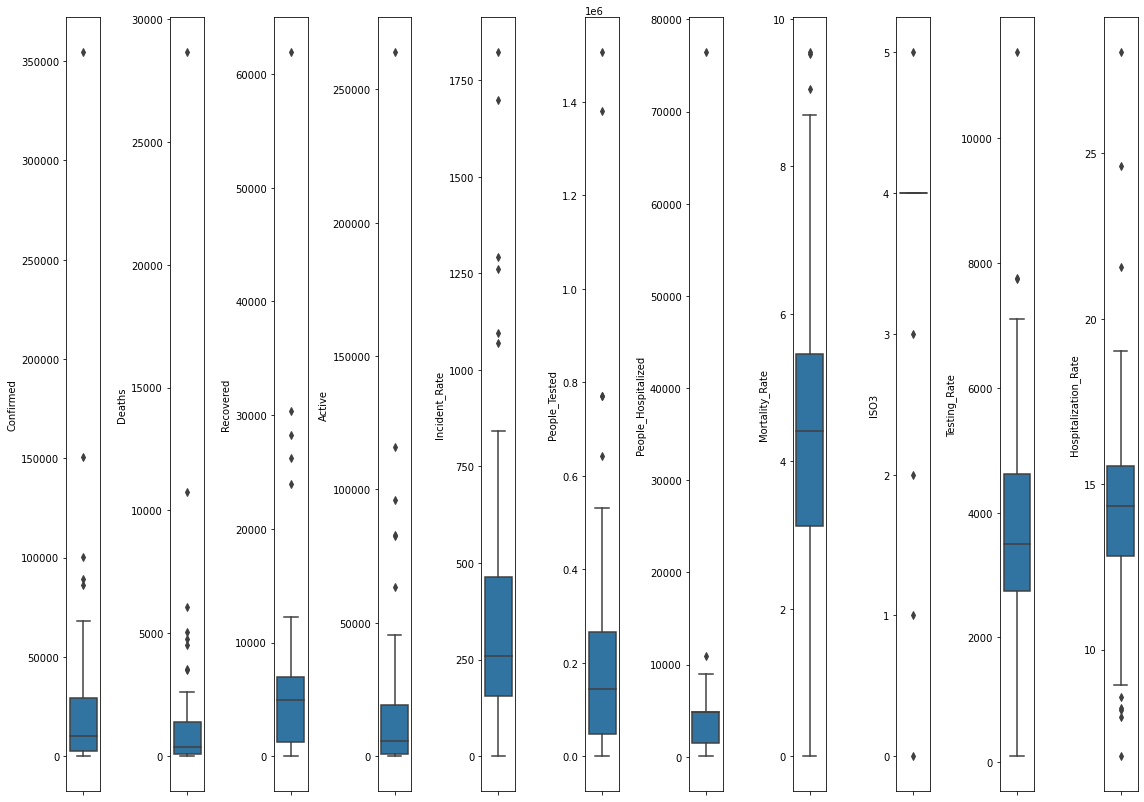

In [61]:
# Checking for outliers

collist = df.columns.values
ncol = 11
nrows = 5

plt.figure(figsize=(16,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()

The dataset we have is very small with only 58 entries, removing rows may result in loss of relavent data. We continue with the dataset with outliers for now and will remove outliers if it results in poor machine learning model.

In [62]:
# Skewness

df.skew()

Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
ISO3                   -4.126625
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [63]:
for i in df.columns:
    if df[i].skew() > 0.55:
        df[i]=np.log(df[i]+1)
    elif df[i].skew() < -0.55:
        df[i]=np.cbrt(df[i])


In [64]:
# Splitting independent variables and target

x = df.drop('Deaths',axis=1)
print(x.head())
y = df[['Deaths']]
print("\n")
print(y.head())

                Confirmed  Recovered    Active  Incident_Rate  People_Tested  \
Province_State                                                                 
Alabama          9.476773   8.854869  9.435961       5.587976      12.010368   
Alaska           5.996452   5.866468  3.688879       4.022051      10.519916   
American Samoa   0.000000   8.854869  0.000000       0.000000       4.828314   
Arizona          9.609586   8.235891  9.248310       5.326851      12.016340   
Arkansas         8.517993   8.256607  6.951772       5.116692      11.474798   

                People_Hospitalized  Mortality_Rate      ISO3  Testing_Rate  \
Province_State                                                                
Alabama                    7.309212        3.999387  1.587401      8.118190   
Alaska                     8.496675        2.493766  1.587401      8.530098   
American Samoa             8.496675        4.458248  0.000000      5.411009   
Arizona                    7.491645        5

In [65]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.321337,0.524235,0.535925,0.063772,0.300989,-0.336196,-2.187272e-01,0.194738,0.012408,-0.734373
1,-1.170832,-1.435602,-1.557578,-1.298088,-0.603393,0.537895,-9.364182e-01,0.194738,0.595783,0.120356
2,-3.741780,0.524235,-2.901336,-4.796003,-4.056963,0.537895,4.233718e-16,-6.906409,-3.821712,0.120356
3,0.378280,0.118300,0.467570,-0.163325,0.304612,-0.201907,2.636756e-01,0.194738,-0.538462,-0.547725
4,-0.089735,0.131886,-0.368996,-0.346096,-0.023986,-1.090756,-1.105661e+00,0.194738,-0.058694,-0.986082


In [66]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [68]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [69]:
model = [LinearRegression(),SVR(),DecisionTreeRegressor()]

for m in model:
    m.fit(x_train,y_train)
    print(m, "model")
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("r2", r2_score(y_test,predm))
    print("mse", mean_squared_error(y_test,predm))
    print("\n")

LinearRegression() model
0.9940747982110423
r2 0.9891191308789061
mse 0.0603248416056402


SVR() model
0.8461975800831794
r2 0.5973899624956869
mse 2.232118268402339


DecisionTreeRegressor() model
1.0
r2 0.9009098674192744
mse 0.5493675630217691




The linear regression model has high r2 score.

In [70]:
# cross_val_score

from sklearn.model_selection import cross_val_score

for m in model:
    print("Cross_val_score for",m ,'is ',cross_val_score(m,x,y,cv=5).mean())

Cross_val_score for LinearRegression() is  0.959910605065384
Cross_val_score for SVR() is  0.7059220863302192
Cross_val_score for DecisionTreeRegressor() is  0.8395963996125744


The cross_val_Score for linear regression model does not indicate any overfitting.

In [71]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(lr, "model")
pred=lr.predict(x_test)
print("r2", r2_score(y_test,pred))
print("mse", mean_squared_error(y_test,pred))
print("Cross_val_score for",lr ,'is ',cross_val_score(lr,x,y,cv=5,scoring='r2').mean())

LinearRegression() model
r2 0.9891191308789061
mse 0.0603248416056402
Cross_val_score for LinearRegression() is  0.959910605065384


In [72]:
# Saving the model - ridge

import joblib
joblib.dump(lr,'lr_USA_covid_deaths.pkl')

['lr_USA_covid_deaths.pkl']